In [7]:
from Utility import *
from BinPacking import *
from AntColonyOptimizer import *

In [8]:
folder_path='InstanceSets/InstanceSet1/'
instance_name = "2- rnd2"
plot_path = 'Plot/' + instance_name

In [9]:
def execute_algorithm(dataset, best_count):
    print(f"- dataset: {dataset}")
    bin_width, bin_height, rectangles = read_items(folder_path + dataset)
    optimizer = AntColonyOptimizer(rectangles, bin_width, bin_height,
                                   alpha = config['alpha'],
                                   beta = config['beta'],
                                   evaporation_rate = config['evaporation_rate'],
                                   ant_count = config['ant_count'],
                                   max_iteration = config['max_iteration'],
                                   elit_percent = config['elit_percent'],
                                   max_duration = config['max_duration'],
                                   stopType = config['stopType'],
                                   ACS_state_tranision_prob = config['ACS_state_tranision_prob'],
                                   best_num_bins = best_count)
    best_solution = optimizer.run()
    print(f"- min bins: {best_count}")
    print(f"- found bins: {len(best_solution)}")
    visualize_bins(best_solution, 'Plot/'+dataset, 1)
    plot_objectives(optimizer.best_objectives, optimizer.avg_objectives,  'Plot/'+dataset)
    plot_ants(optimizer.number_ants, 'Plot/'+dataset)
    plot_acs(optimizer.ACS_probs, 'Plot/'+dataset)
    # plot_pheromone_graph(optimizer.pheromones, 'Plot/'+dataset)
    print("-"*30)
    return optimizer

In [13]:
config = read_config('Config/ACO.json')
datasets = read_excel()
best_num_bins = read_excel_best_solutions()
# datasets = ['cl_03_060_04']
for i in range(1): 
    bins_size = []
    execution_times = []
    for j, dataset in enumerate(datasets):
        optimizer = execute_algorithm(dataset, best_num_bins[j])
        bins_size.append(len(optimizer.best_solution))
        execution_times.append(optimizer.execution_time)
    write_excel_bins(bins_size)
    write_excel_time(execution_times)
    print(f" ------------------------- run number: {i + 1} ----------------------------")

- dataset: cl_01_020_09
- min bins: 8
- found bins: 8
------------------------------
- dataset: cl_01_040_04
- min bins: 13
- found bins: 15
------------------------------
- dataset: cl_01_060_05
- min bins: 19
- found bins: 19
------------------------------
- dataset: cl_01_080_08
- min bins: -1
- found bins: 30
------------------------------
- dataset: cl_01_100_06
- min bins: -1
- found bins: 37
------------------------------
- dataset: cl_02_020_04
- min bins: 1
- found bins: 1
------------------------------
- dataset: cl_02_040_02
- min bins: 2
- found bins: 2
------------------------------
- dataset: cl_02_060_03
- min bins: 3
- found bins: 3
------------------------------
- dataset: cl_02_080_01
- min bins: 3
- found bins: 3
------------------------------
- dataset: cl_02_100_02
- min bins: 4
- found bins: 4
------------------------------
- dataset: cl_03_020_05
- min bins: 4
- found bins: 4
------------------------------
- dataset: cl_03_040_07
- min bins: 8
- found bins: 9
---

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
df = pd.DataFrame.from_dict(pos, orient='index', columns=['x', 'y'])
gmm = GaussianMixture(n_components= len(best_solution) -1)
gmm.fit(df.values)
labels = gmm.predict(df.values)

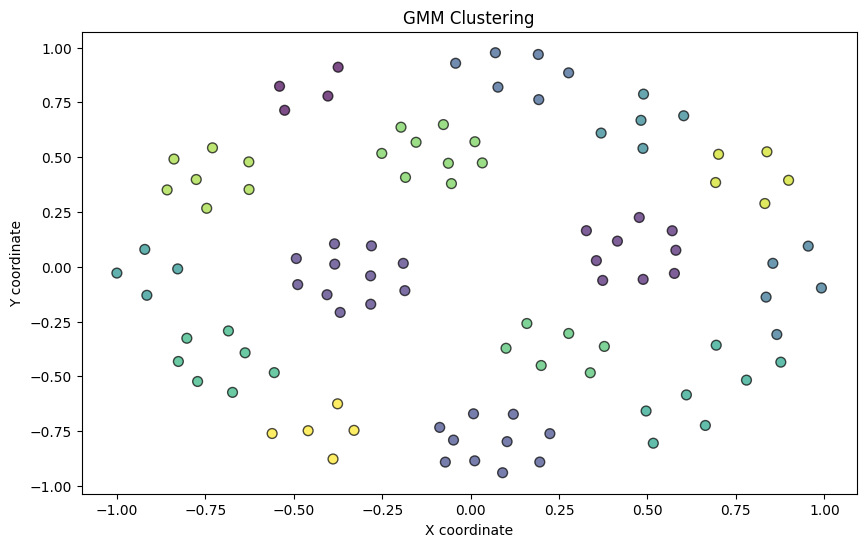

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(df['x'], df['y'], c=labels, cmap='viridis', marker='o', alpha=0.7, edgecolor='k', s=50)
centers = gmm.means_
plt.title('GMM Clustering')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.show()

In [6]:
for i,row in enumerate(optimizer.pheromones):
    print(f"min: {min(row)}")
    print(f"max: {max(row)}")
    print(f"--- item {i} ----")

min: 0
max: 3.690345459262356
--- item 0 ----
min: 0
max: 3.609512717798416
--- item 1 ----
min: 0
max: 3.568947501687825
--- item 2 ----
min: 0
max: 3.004194220226717
--- item 3 ----
min: 0
max: 4.071969895897313
--- item 4 ----
min: 0
max: 3.690345459262356
--- item 5 ----
min: 0
max: 4.074926602692932
--- item 6 ----
min: 0
max: 3.4978597780596647
--- item 7 ----
min: 0
max: 3.83000328200176
--- item 8 ----
min: 0
max: 4.116534819654705
--- item 9 ----
min: 0
max: 4.11651466026398
--- item 10 ----
min: 0
max: 3.1939642083155295
--- item 11 ----
min: 0
max: 4.063523993012068
--- item 12 ----
min: 0
max: 4.049983660886701
--- item 13 ----
min: 0
max: 3.677309060189952
--- item 14 ----
min: 0
max: 1.3436076091885056
--- item 15 ----
min: 0
max: 3.833767569585399
--- item 16 ----
min: 0
max: 4.054603215878194
--- item 17 ----
min: 0
max: 2.5881457031827066
--- item 18 ----
min: 0
max: 4.090348696911871
--- item 19 ----
min: 0
max: 4.054603215878194
--- item 20 ----
min: 0
max: 2.8942522